In [9]:
import os

path = "/Users/ioanna/Desktop/Data/LUMC"
samples = ["01_100", "02_100", "03_50", "04_75", "05_90", "06_95", "07_98", "08_0", "09_0"]
for sample in samples: 
    sample_bam = sample + ".sorted.bam"
    path_sample = os.path.join(path, sample_bam)
    os.system("samtools depth {} > {}.depth".format(path_sample, sample))


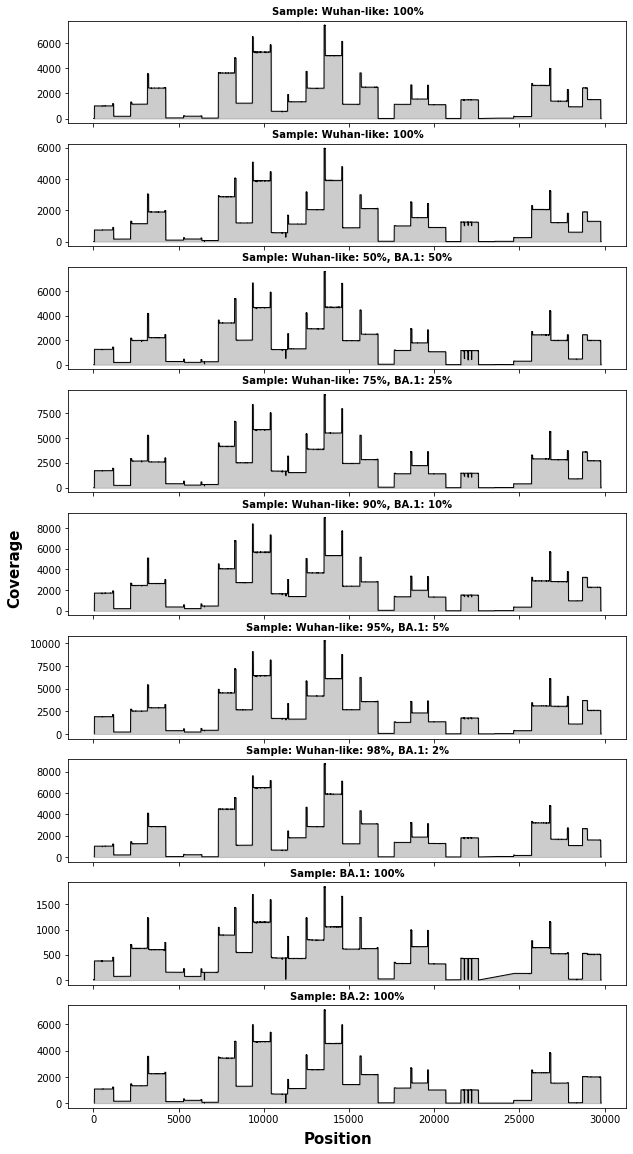

In [28]:
# read the depth files and plot the coverage per position and per sample
# plot everything in the same figure, each sample in a different subplot
# vertically align the subplots
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

names = {}

names = {
    "01_100": "Wuhan-like: 100%",
    "02_100": "Wuhan-like: 100%",
    "03_50": "Wuhan-like: 50%, BA.1: 50%",
    "04_75": "Wuhan-like: 75%, BA.1: 25%",
    "05_90": "Wuhan-like: 90%, BA.1: 10%",
    "06_95": "Wuhan-like: 95%, BA.1: 5%",
    "07_98": "Wuhan-like: 98%, BA.1: 2%",
    "08_0": "BA.1: 100%",
    "09_0": "BA.2: 100%"
}

fig, axs = plt.subplots(len(samples), 1, figsize=(10, 20), sharex=True)
for i, sample in enumerate(samples):
    path_sample_depth = sample + ".depth"
    depth = pd.read_csv(path_sample_depth, sep="\t", header=None, names=["chrom", "pos", "coverage"])
    axs[i].plot(list(depth["pos"]), list(depth["coverage"]), color="black", linewidth=1)
    # fill the area under the curve
    axs[i].fill_between(list(depth["pos"]), list(depth["coverage"]), color="grey", alpha=0.4)
    axs[i].set_title("Sample: " + names[sample], fontsize=10, fontweight="bold")


# set a common x-axis label
fig.text(0.5, 0.1, 'Position', ha='center', fontsize=15, fontweight="bold")
# set a common y-axis label
fig.text(0.04, 0.5, 'Coverage', va='center', rotation='vertical', fontsize=15, fontweight="bold")

# save the figure
# plt.tight_layout()
plt.savefig("coverage_per_position_per_sample.pdf", format="pdf", dpi=300, bbox_inches="tight") 
